# Análisis Exploratorio de Datos (EDA) - Coffee Quality Database

Este notebook contiene el análisis exploratorio inicial del dataset de calidad del café del Coffee Quality Institute (CQI).

## Objetivos:
1. Cargar y entender la estructura de los datos
2. Analizar variables y sus distribuciones
3. Identificar valores faltantes y outliers
4. Explorar correlaciones entre variables
5. Visualizar patrones y tendencias

**Autor:** Ricardo Contreras, Daniel Leon, Santiago Graciano  
**Fecha:** Octubre 2025

## 1. Configuración e Importación de Librerías

In [5]:
# Importaciones estándar
import sys
from pathlib import Path
import warnings

# Análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Configuración
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Agregar src al path para imports
project_root = Path.cwd()
sys.path.append(str(project_root / 'src'))

print("✓ Librerías importadas correctamente")
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ NumPy version: {np.__version__}")

✓ Librerías importadas correctamente
✓ Pandas version: 2.3.3
✓ NumPy version: 2.3.4


## 2. Carga de Datos

In [11]:
# Rutas a los datos
data_path = project_root / 'data' / 'raw'

print(f"✓ Ruta de datos establecida en: {data_path}")
# Cargar datasets
arabica_df = pd.read_csv(data_path / 'arabica_data_cleaned.csv', index_col=0)
robusta_df = pd.read_csv(data_path / 'robusta_data_cleaned.csv', index_col=0)
merged_df= pd.read_csv(data_path / 'merged_data_cleaned.csv', index_col=0)

print(f"✓ Dataset Arábica cargado: {arabica_df.shape}")
print(f"✓ Dataset Robusta cargado: {robusta_df.shape}")
print(f"✓ Dataset Merged cargado: {merged_df.shape}")

✓ Ruta de datos establecida en: /home/rickcontreras/proyectos/coffee-quality-prediction/data/raw
✓ Dataset Arábica cargado: (1311, 43)
✓ Dataset Robusta cargado: (28, 43)
✓ Dataset Merged cargado: (1339, 43)


## 3. Exploración Inicial

In [12]:
# Primeras filas del dataset de Arábica
print("=== CAFÉ ARÁBICA - Primeras 5 filas ===")
display(arabica_df.head())

=== CAFÉ ARÁBICA - Primeras 5 filas ===


,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [13]:
# Información general
print("=== INFORMACIÓN GENERAL - ARÁBICA ===")
arabica_df.info()

=== INFORMACIÓN GENERAL - ARÁBICA ===
<class 'pandas.core.frame.DataFrame'>
Index: 1311 entries, 1 to 1312
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1311 non-null   object 
 1   Owner                  1304 non-null   object 
 2   Country.of.Origin      1310 non-null   object 
 3   Farm.Name              955 non-null    object 
 4   Lot.Number             270 non-null    object 
 5   Mill                   1001 non-null   object 
 6   ICO.Number             1163 non-null   object 
 7   Company                1102 non-null   object 
 8   Altitude               1088 non-null   object 
 9   Region                 1254 non-null   object 
 10  Producer               1081 non-null   object 
 11  Number.of.Bags         1311 non-null   int64  
 12  Bag.Weight             1311 non-null   object 
 13  In.Country.Partner     1311 non-null   object 
 14  Harvest.Year           

In [18]:
# Estadísticas descriptivas
print("=== ESTADÍSTICAS DESCRIPTIVAS - ARÁBICA ===")
display(arabica_df.describe())

=== ESTADÍSTICAS DESCRIPTIVAS - ARÁBICA ===


,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


## 4. Análisis de Variables

In [16]:
# Análisis de la variable objetivo: Total Cup Points
print("=== ANÁLISIS DE LA VARIABLE OBJETIVO ===")
print(f"Media: {arabica_df['Total.Cup.Points'].mean():.2f}")
print(f"Mediana: {arabica_df['Total.Cup.Points'].median():.2f}")
print(f"Desviación estándar: {arabica_df['Total.Cup.Points'].std():.2f}")
print(f"Mínimo: {arabica_df['Total.Cup.Points'].min():.2f}")
print(f"Máximo: {arabica_df['Total.Cup.Points'].max():.2f}")

=== ANÁLISIS DE LA VARIABLE OBJETIVO ===
Media: 82.12
Mediana: 82.50
Desviación estándar: 3.52
Mínimo: 0.00
Máximo: 90.58


## 5. Valores Faltantes

In [19]:
# Análisis de valores faltantes
missing_data = arabica_df.isnull().sum()
missing_percent = (missing_data / len(arabica_df)) * 100
missing_df = pd.DataFrame({
    'Valores Faltantes': missing_data,
    'Porcentaje': missing_percent
}).sort_values(by='Porcentaje', ascending=False)

print("=== VALORES FALTANTES ===")
display(missing_df[missing_df['Valores Faltantes'] > 0])

=== VALORES FALTANTES ===


,Valores Faltantes,Porcentaje
Lot.Number,1041,79.405034
Farm.Name,356,27.154844
Mill,310,23.646072
Color,267,20.366133
Producer,230,17.543860
altitude_high_meters,227,17.315027
altitude_low_meters,227,17.315027
altitude_mean_meters,227,17.315027
Altitude,223,17.009916
Company,209,15.942029


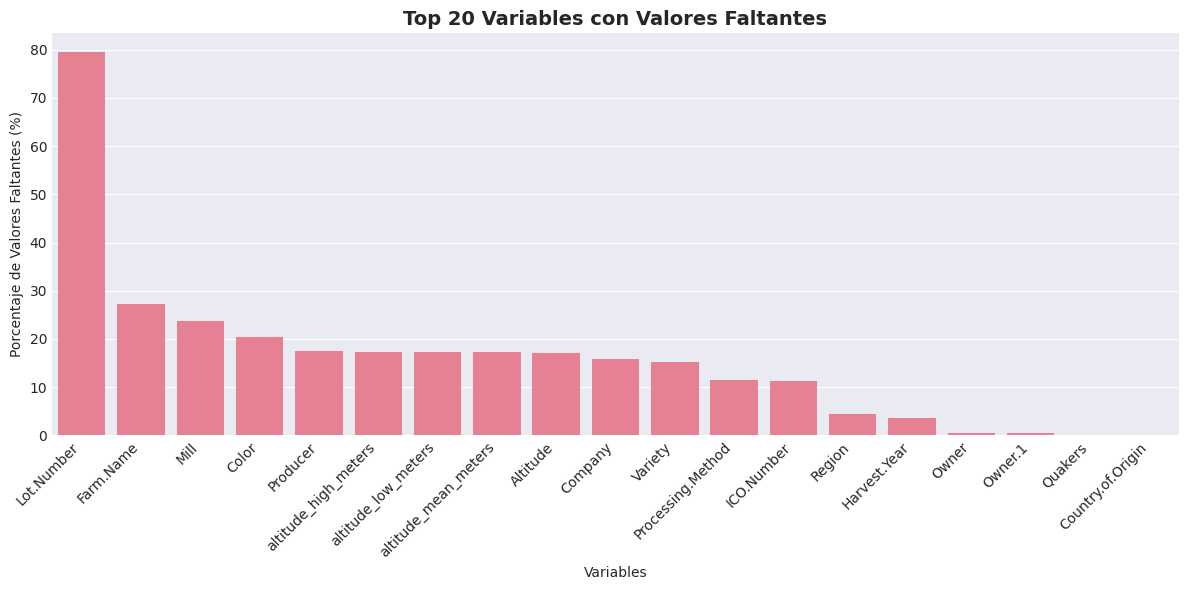

In [20]:
# Visualización de valores faltantes
fig, ax = plt.subplots(figsize=(12, 6))
missing_plot = missing_df[missing_df['Valores Faltantes'] > 0].head(20)
sns.barplot(x=missing_plot.index, y='Porcentaje', data=missing_plot, ax=ax)
ax.set_title('Top 20 Variables con Valores Faltantes', fontsize=14, fontweight='bold')
ax.set_xlabel('Variables')
ax.set_ylabel('Porcentaje de Valores Faltantes (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Distribuciones de Variables Numéricas

In [21]:
# Seleccionar variables numéricas relevantes
numeric_cols = arabica_df.select_dtypes(include=[np.number]).columns.tolist()

# Variables sensoriales importantes
sensory_vars = [
    'Total.Cup.Points', 'Aroma', 'Flavor', 'Aftertaste', 
    'Acidity', 'Body', 'Balance', 'Uniformity', 
    'Clean.Cup', 'Sweetness'
]

# Filtrar variables que existan en el dataset
sensory_vars = [col for col in sensory_vars if col in numeric_cols]

print(f"Variables sensoriales disponibles: {len(sensory_vars)}")

Variables sensoriales disponibles: 10


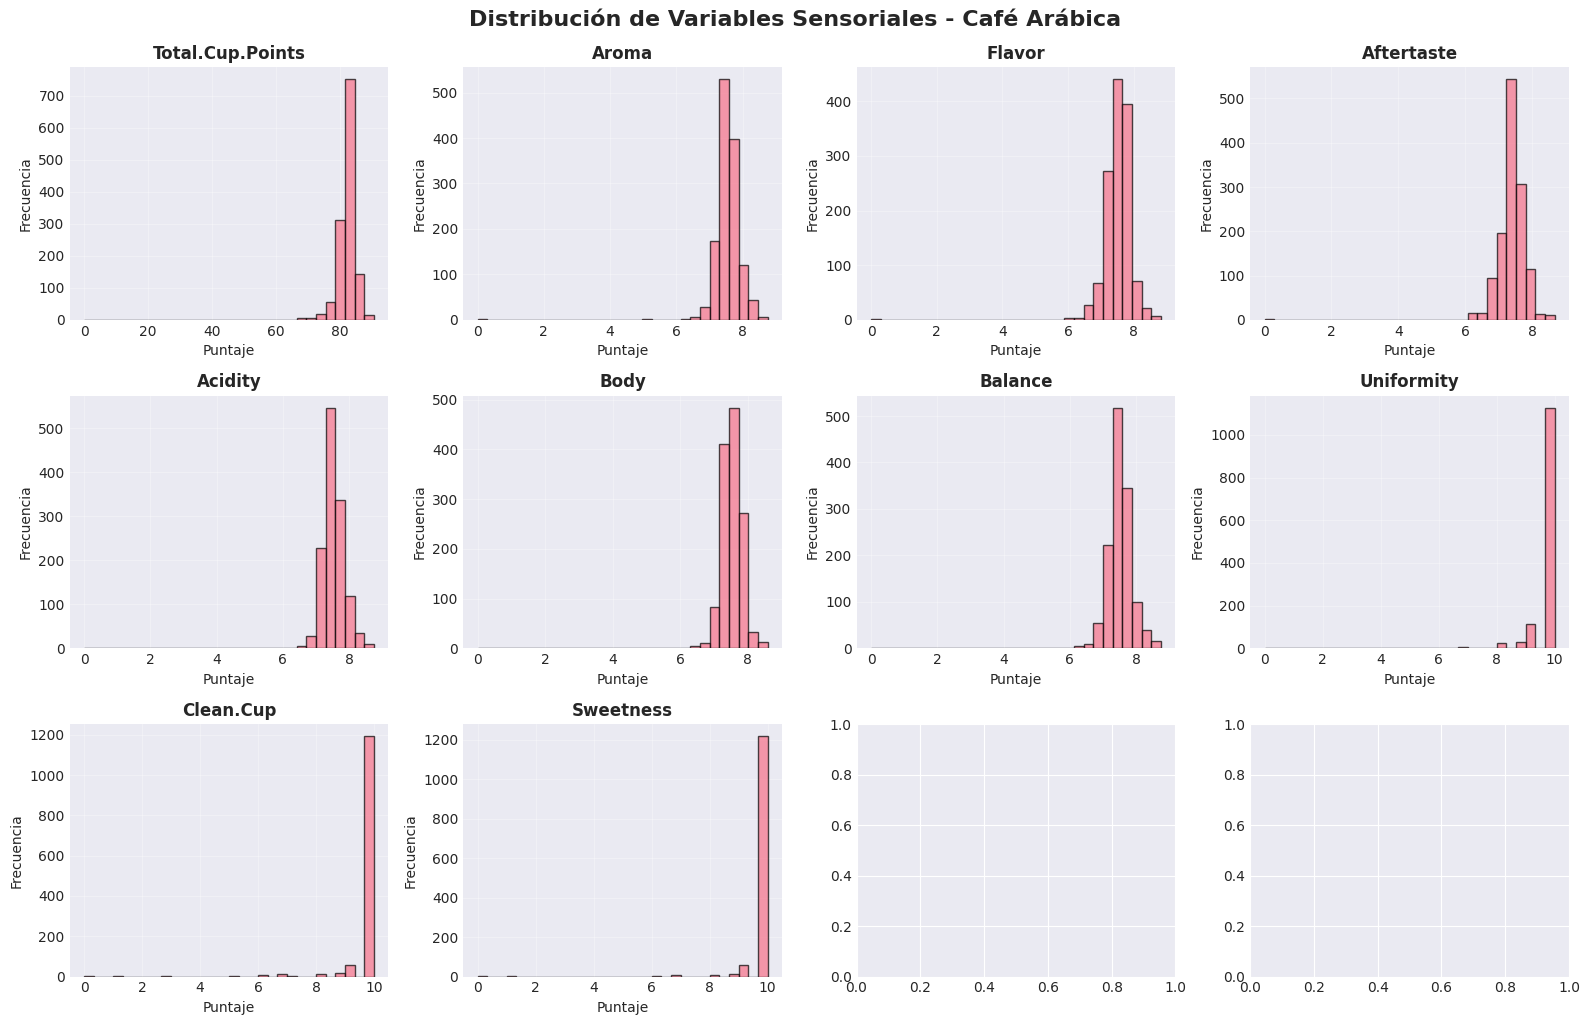

In [22]:
# Histogramas de variables sensoriales
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(sensory_vars[:12]):
    axes[idx].hist(arabica_df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].set_xlabel('Puntaje')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribución de Variables Sensoriales - Café Arábica', 
             y=1.02, fontsize=16, fontweight='bold')
plt.show()

## 7. Matriz de Correlación

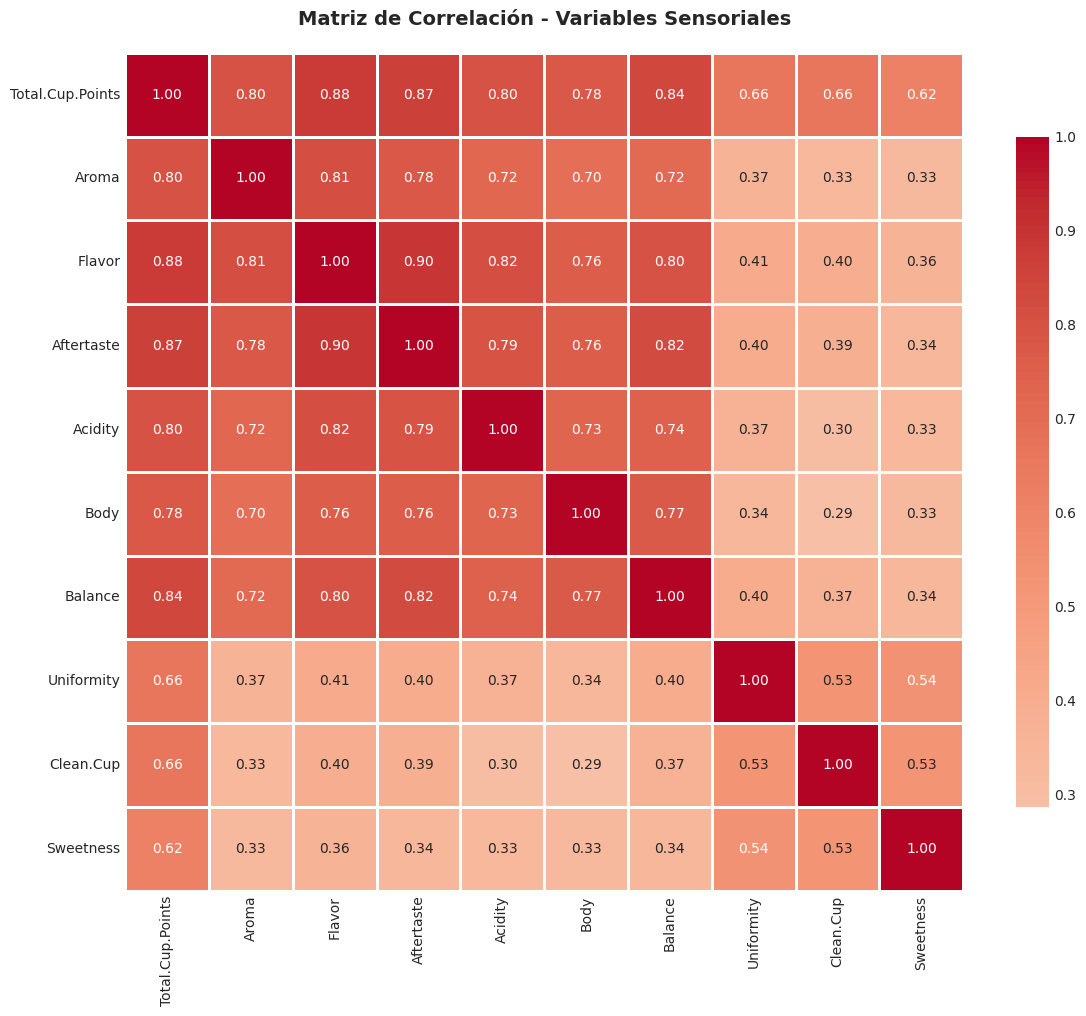

In [23]:
# Calcular matriz de correlación
correlation_matrix = arabica_df[sensory_vars].corr()

# Visualizar matriz de correlación
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
ax.set_title('Matriz de Correlación - Variables Sensoriales', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 8. Análisis por País de Origen

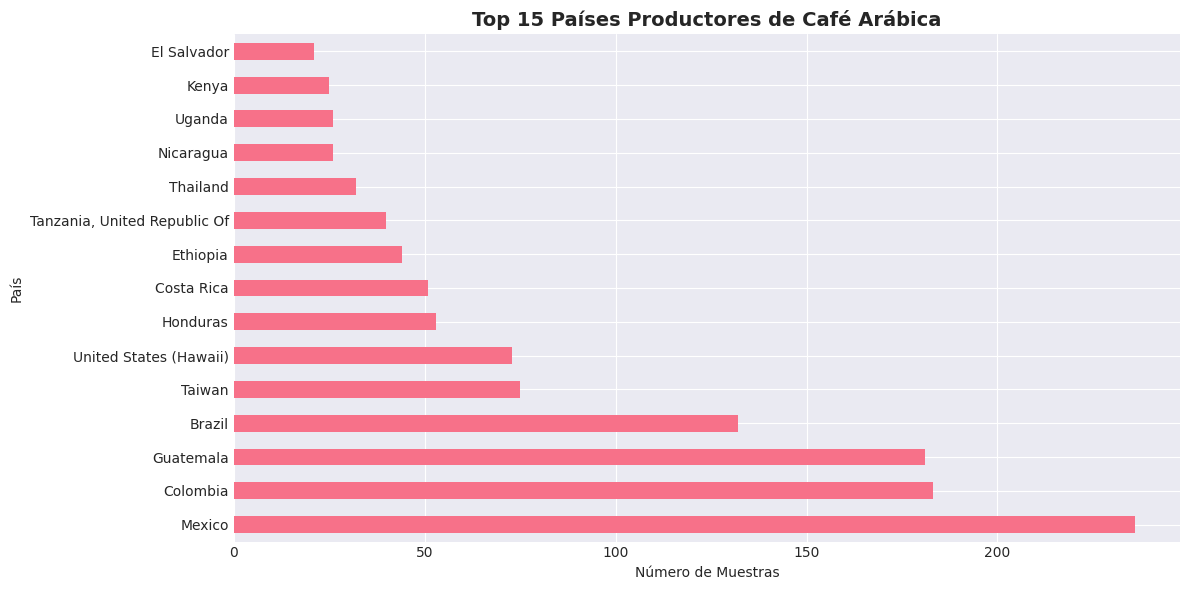


=== TOP 10 PAÍSES PRODUCTORES ===


Country.of.Origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Name: count, dtype: int64

In [24]:
# Top países productores
if 'Country.of.Origin' in arabica_df.columns:
    top_countries = arabica_df['Country.of.Origin'].value_counts().head(15)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    top_countries.plot(kind='barh', ax=ax)
    ax.set_title('Top 15 Países Productores de Café Arábica', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Número de Muestras')
    ax.set_ylabel('País')
    plt.tight_layout()
    plt.show()
    
    print("\n=== TOP 10 PAÍSES PRODUCTORES ===")
    display(top_countries.head(10))

## 9. Conclusiones Preliminares

**A completar después del análisis:**

1. Descripción general de los datos
2. Principales hallazgos sobre la calidad del café
3. Variables con mayor correlación
4. Problemas identificados (valores faltantes, outliers)
5. Próximos pasos para el preprocesamiento

## 10. Guardar Observaciones Clave

In [25]:
# Crear diccionario con hallazgos clave
eda_findings = {
    'total_samples_arabica': len(arabica_df),
    'total_samples_robusta': len(robusta_df),
    'features_count': len(arabica_df.columns),
    'missing_values_summary': missing_df.to_dict(),
    'target_mean': arabica_df['Total.Cup.Points'].mean(),
    'target_std': arabica_df['Total.Cup.Points'].std(),
}

print("✓ Hallazgos clave guardados para referencia")

✓ Hallazgos clave guardados para referencia
